In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

C:\Users\3lett\AppData\Local\Temp\ipykernel_28296\3624788073.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


จะเห็นได้จากข้อมูลนี้ว่า default rate(หนี้สูญ) = 15% 

# Part 6: สาเหตุที่อาจเป็นเหตุให้เกิดการไม่จ่ายหนี้ กยศ
---


จากบทสัมภาษณ์ของนายชัยณรงค์ กัจฉปานันท์ ผู้จัดการกองทุนเงินให้กู้ยืมเพื่อการศึกษา ปัจจุบันกยศ.นั้นมีหนี้เสียสะสมถึงประมาณ 1 แสนล้านบาท ซึ่งเพิ่มขึ้นเกือบเท่าตัวจากเมื่อปี 2560 ซึ่งมีหนี้เสียประมาณ 6 หมื่นล้านบาท ซึ่งในบทนี้เราจะมาพยายามวิเคราะห์ว่ามีปัจจัยใดบ้างที่อาจเป็นสาเหตุให้คนไทยไม่จ่ายหนี้กยศ.กัน

## 1. สถานะของผู้กู้ยืม

In [3]:
df1 = pd.read_excel('https://github.com/purachai-phonwisut/student-loan-analysis/raw/main/Data/%E0%B8%82%E0%B9%89%E0%B8%AD%E0%B8%A1%E0%B8%B9%E0%B8%A5%E0%B8%88%E0%B8%B3%E0%B8%99%E0%B8%A7%E0%B8%99%E0%B8%9C%E0%B8%B9%E0%B9%89%E0%B8%81%E0%B8%B9%E0%B9%89%E0%B8%A2%E0%B8%B7%E0%B8%A1%E0%B9%81%E0%B8%A2%E0%B8%81%E0%B8%95%E0%B8%B2%E0%B8%A1%E0%B8%AA%E0%B8%96%E0%B8%B2%E0%B8%99%E0%B8%B0.xlsx')
df1

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท)
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00


In [4]:
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = (df1['จำนวนเงินกู้ยืม(บาท)'] / df1['จำนวนเงินกู้ยืม(บาท)'].sum()) * 100
df1['อัตราส่วนของผู้กู้แต่ละสถานะ'] = df1['อัตราส่วนของผู้กู้แต่ละสถานะ'].map(lambda x: "{:.2f}".format(x)).astype(float)
df1

,ลำดับสถานะ,สถานะผู้กู้ยืม,จำนวนผู้กู้ยืม(รายบัญชี),จำนวนเงินกู้ยืม(บาท),จำนวนเงินต้นผิดนัดชำระหนี้(บาท),อัตราส่วนของผู้กู้แต่ละสถานะ
0,10,1.อยู่ระหว่างศึกษา ปลอดหนี้,1366838,1.432988e+11,0.000000e+00,11.95
1,20,2.อยู่ระหว่างชำระหนี้,3519163,4.518960e+11,9.736006e+10,37.68
2,21,2.1ไม่ผิดนัดชำระหนี้,1277319,1.889971e+11,0.000000e+00,15.76
3,22,2.2ผิดนัดชำระหนี้,2241844,2.628990e+11,9.736006e+10,21.92
4,30,3.ชำระหนี้เสร็จสิ้น,1848558,1.457144e+11,0.000000e+00,12.15
5,40,4.เสียชีวิต ทุพพลภาพ,72270,6.391653e+09,0.000000e+00,0.53


[Text(0, 0, '11.95'),
 Text(0, 0, '37.68'),
 Text(0, 0, '15.76'),
 Text(0, 0, '21.92'),
 Text(0, 0, '12.15'),
 Text(0, 0, '0.53')]

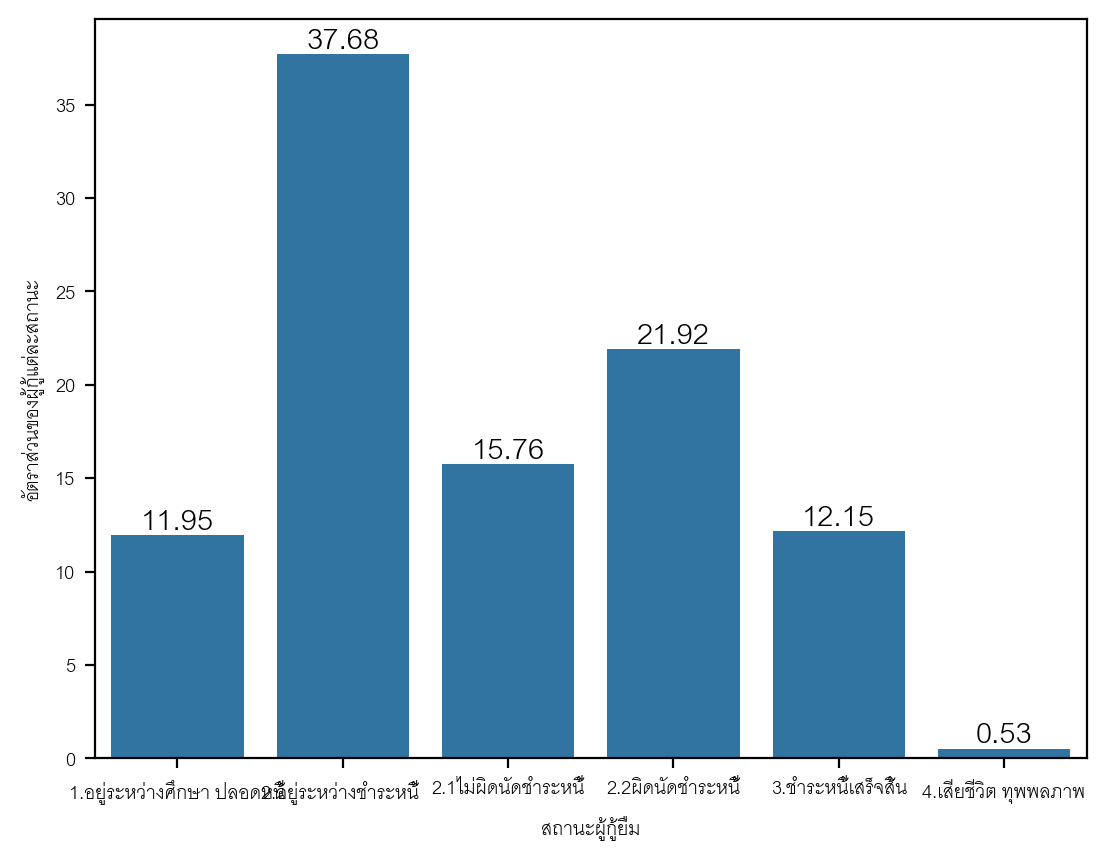

In [5]:
plt.rcParams['font.family'] = 'Cordia new'
g=sns.barplot(data=df1, y="อัตราส่วนของผู้กู้แต่ละสถานะ", x="สถานะผู้กู้ยืม");
g.bar_label(g.containers[0], fontsize=16)

จากกราฟนี้เราจะเห็นได้จากฐานข้อมูลเปิดรัฐว่าจำนวนคนที่ผิดนัดชำระหนี้นั้นมีอัตราส่วนค่อนข้างสูง นับเป็น 21.92% นับเป็นกว่า 97,000 ล้านบาท

## 2. สถานะของคนที่กำลังชำระหนี้

ข้อมูลต่อไปนี้เป็นข้อมูลของจำนวนคนที่พ้นระยะปลอดหนี้ไปแล้วทั้งหมด ซึ่งก็คือ 2 ปีหลังจากเรียนจบ

In [6]:
# read_csv dataframe
df2 = pd.read_csv('https://data.go.th/dataset/7d177ea4-058d-4562-b7ed-283509aeffed/resource/3aa051d7-b476-4c27-848a-55136f8cd688/download/xx.csv')

# rename column names for easier access
df2.rename(columns={'ปีงบประมาณ': 'Year', ' จำนวนผู้กู้ยืมที่อยู่ระหว่างชำระหนี้ ': 'Count', ' พบข้อมูลจากภาครัฐ ': 'ภาครัฐ', ' พบข้อมูลจากภาคเอกชน ': 'เอกชน'}, inplace=True)

# create a variable to prepare to convert objects to float
cols_to_clean = ['Count', 'ภาครัฐ', 'เอกชน']
df2[cols_to_clean] = df2[cols_to_clean].apply(lambda x: x.str.replace(',', ''))
df2[cols_to_clean] = df2[cols_to_clean].astype(float)

# use apply and lambda to create a new column that accounts for missing people outside of ภาครัฐ and เอกชน
df2['ไม่สังกัดหน่วยงาน'] = df2.apply(lambda x: x['Count'] - (x['ภาครัฐ']+x['เอกชน']), axis=1)

# change to long format
melt_df2 = df2.melt(id_vars=['Year'], var_name='Category', value_name='Value')

# Sort_value
Tidy_df2 = melt_df2.sort_values('Year').reset_index()
Tidy_df2.drop('index', axis=1, inplace=True)


<Axes: xlabel='Year', ylabel='Value'>

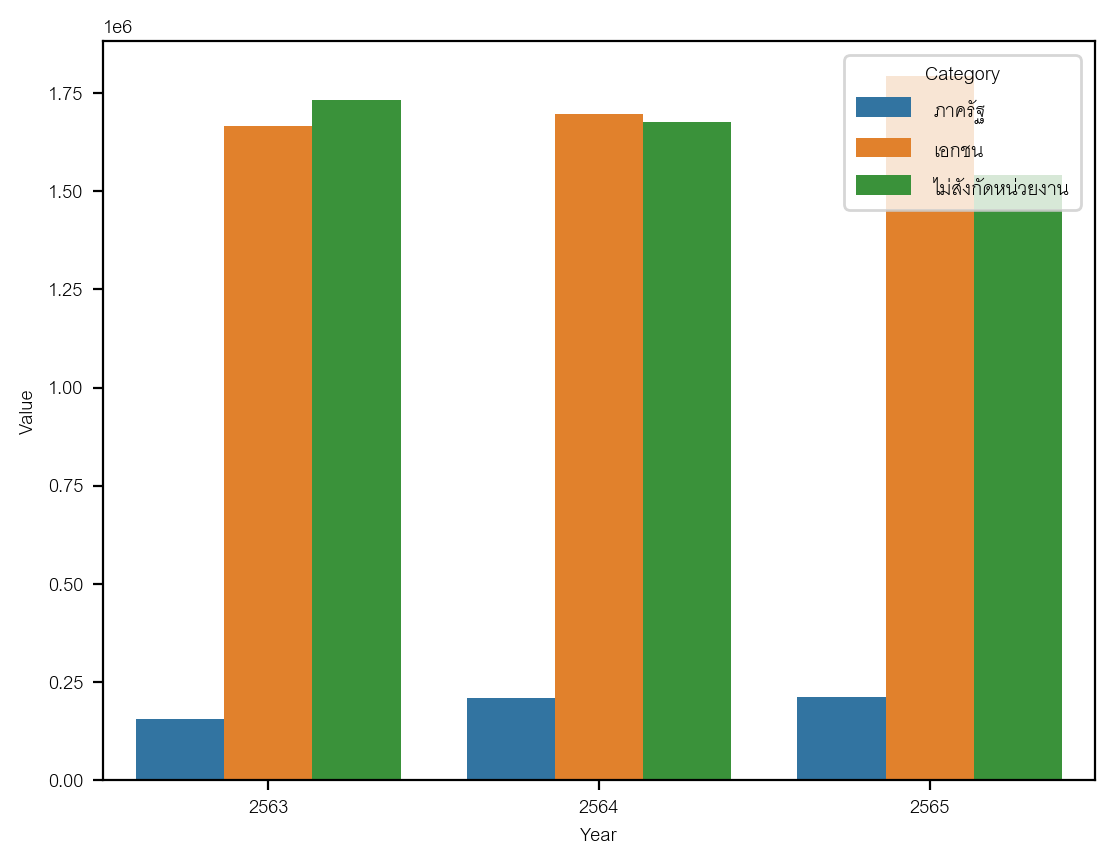

In [7]:
df_filtered = Tidy_df2[Tidy_df2['Category'] != 'Count']

plt.rcParams['font.family'] = 'Cordia new'
sns.barplot(data=df_filtered, x='Year',y='Value', hue='Category')

จะเห็นได้จากกราฟว่ามีจำนวนคนที่ไม่ได้สังกัดหน่วยงานใดเป็นจำนวนมาก 

เดี๋ยวกลับมา highlight ตอนนี้ยังทำไม่เป็น จริงๆ ทำเป็นมีงานทำกับไม่มีงานทำก็ดีเหมือนกันนะ

จะเห็นได้จากกราฟว่ามีคนที่จบการศึกษาแล้วไม่มีงานทำอยู่จำนวนมาก บางปีคิดเป็น ...%ของคนที่มีงานแล้วเลย(สูงสุด)

In [16]:
df2['มีงานทำ'] = df2.apply(lambda x: x['ภาครัฐ'] + x['เอกชน'], axis=1)
df2.rename(columns={'ไม่สังกัดหน่วยงาน': 'ไม่มีงานทำ'}, inplace=True)
df3 = df2[['Year', 'ไม่มีงานทำ', 'มีงานทำ']].copy()

melt_df3 = df3.melt(id_vars=['Year'], value_vars=['ไม่มีงานทำ', 'มีงานทำ'])
melt_df3

,Year,variable,value
0,2563,ไม่มีงานทำ,1731600.0
1,2564,ไม่มีงานทำ,1677079.0
2,2565,ไม่มีงานทำ,1541591.0
3,2563,มีงานทำ,1822641.0
4,2564,มีงานทำ,1906882.0
5,2565,มีงานทำ,2004627.0


<Axes: xlabel='Year', ylabel='value'>

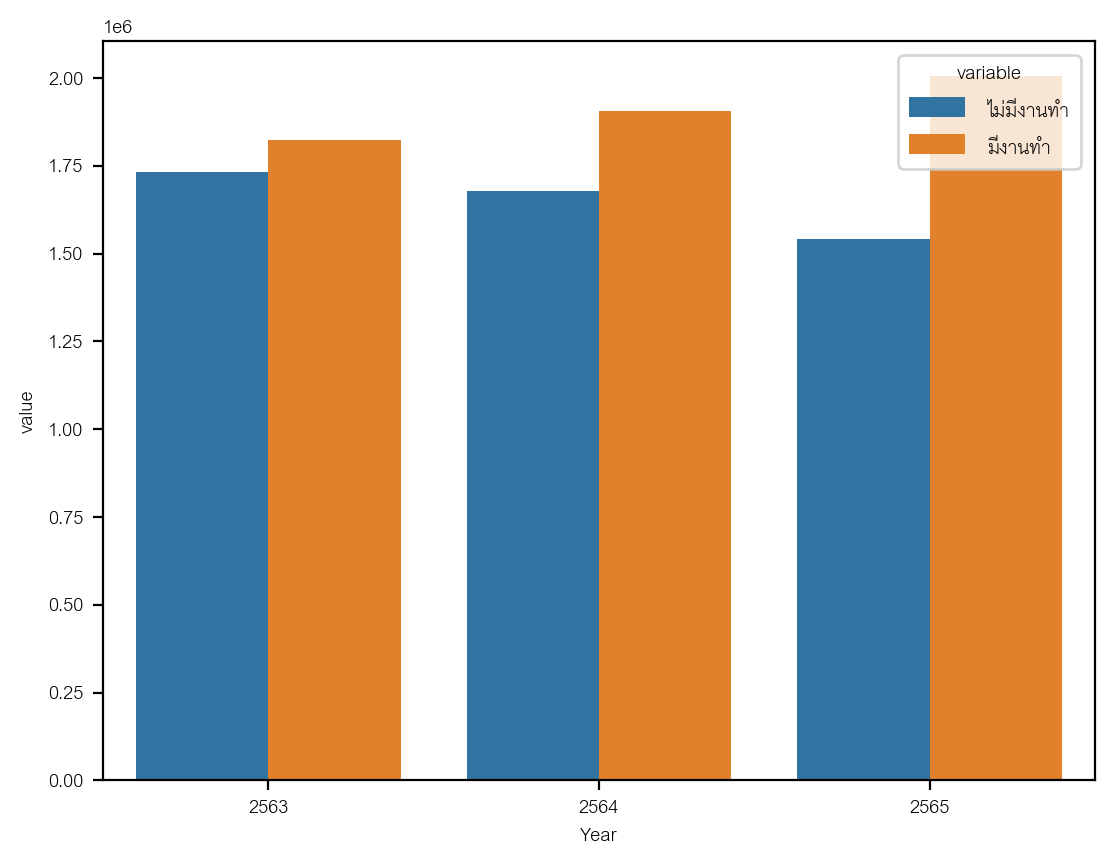

In [17]:
sns.barplot(data=melt_df3, x='Year', y='value', hue='variable')

จากข้อมูลในกราฟ จะเห็นได้ว่ามีคนที่ไม่มีงานทำสูงมากในปีพ.ศ.2563 และระยะห่างของคนมีงานทำและไม่มีงานทำก็เริ่มห่างกันในปี 2564 และ 2565 ตามลำดับ สนับสนุนความเป็นไปได้ที่วิกฤตโควิต-19 ทำให้คนไม่ได้งานหลังจากเรียนจบจำนวนมาก ส่งผลทำให้ยอดหนี้เสียสะสมระหว่างปี 2560-2566 พุ่งสูงขึ้นเป็นเท่าตัว

## 3. ค่าครองชีพตลอด 10 ปีที่ผ่านมา

ต่อไปเราจะวิเคราะห์ข้อมูลค่าเฉลี่ยค่าใช้จ่ายต่อเดือน(หน่วยบาท) ตั้งแต่ปี 2555-2565 เพื่อวิเคราะห์ว่าเหตุผลที่คนไม่จ่ายหนี้กยศ.จะมีผลมาจากการที่ค่าครองชีพเฉลี่ยนั้นเพิ่มสูงขึ้นหรือไม่

In [18]:
df1=pd.read_excel("https://www.nso.go.th/nsoweb/downloadFile/stat_impt/jA/file_xls_th", skiprows=2, skipfooter=1)
df1

,ภาค,จังหวัด,2555,2556,2557,2558,2559,2560,2561,2562,2563,2564,2565
0,ทั่วราชอาณาจักร,ทั่วราชอาณาจักร,18766.00,19061.0,20891.74,21157.0,21144.15,21436.50,21346.01,20742.12,21329.09,21616.00,22372.00
1,กรุงเทพมหานคร และ 3 จังหวัด,กรุงเทพมหานคร และ 3 จังหวัด,31971.46,32425.0,31605.79,30882.0,32091.05,33126.02,33408.08,30778.10,31142.48,31382.00,28962.00
2,NaN,กรุงเทพมหานคร,33956.98,35023.7,34425.64,33085.7,35101.40,35350.70,34127.44,31753.04,32052.03,31866.68,27970.47
3,NaN,สมุทรปราการ,25860.88,26192.9,22747.21,22331.8,24353.97,24354.72,23231.71,21423.43,23850.82,27484.76,24709.65
4,NaN,นนทบุรี,28731.23,26946.6,30812.06,31381.0,28828.37,33313.04,33808.98,32189.09,33042.31,33995.57,30990.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,NaN,ตรัง,19617.83,20922.3,17107.10,19794.9,18599.29,18768.44,18648.61,20143.01,17904.52,18296.68,21059.28
79,NaN,พัทลุง,18404.19,16635.7,18514.03,17143.3,18420.66,16807.88,15947.09,15848.77,16817.89,17578.04,19307.15
80,NaN,ปัตตานี,14119.15,16668.1,14809.34,15341.1,17962.18,16948.61,15705.85,15948.56,14862.49,15392.67,17810.29
81,NaN,ยะลา,12883.10,12521.7,12370.15,13453.9,14122.15,15483.63,13301.01,13595.63,14141.04,14927.64,15603.01


In [60]:
# Groupby ภาค
# เติมภาคให้เต็มช่อง
df1['ภาค'] = df1['ภาค'].fillna(method='ffill')

# Groupby ภาค
years = [2555, 2556, 2557, 2558, 2559, 2560, 2561, 2562, 2563, 2564, 2565]
grouped_df1 = df1.groupby('ภาค')[years].mean().round(2).reset_index()
melt_df1 = grouped_df1.melt(id_vars=['ภาค'], var_name='Year', value_name='value')
melt_df1

C:\Users\3lett\AppData\Local\Temp\ipykernel_28296\4209119786.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df1['ภาค'] = df1['ภาค'].fillna(method='ffill')


,ภาค,Year,value
0,กรุงเทพมหานคร และ 3 จังหวัด,2555,30237.87
1,ทั่วราชอาณาจักร,2555,18766.00
2,ภาคกลาง,2555,19439.50
3,ภาคตะวันออกเฉียงเหนือ,2555,14087.79
4,ภาคเหนือ,2555,13812.60
...,...,...,...
61,ทั่วราชอาณาจักร,2565,22372.00
62,ภาคกลาง,2565,22418.29
63,ภาคตะวันออกเฉียงเหนือ,2565,18460.34
64,ภาคเหนือ,2565,17195.65


<Axes: xlabel='Year', ylabel='value'>

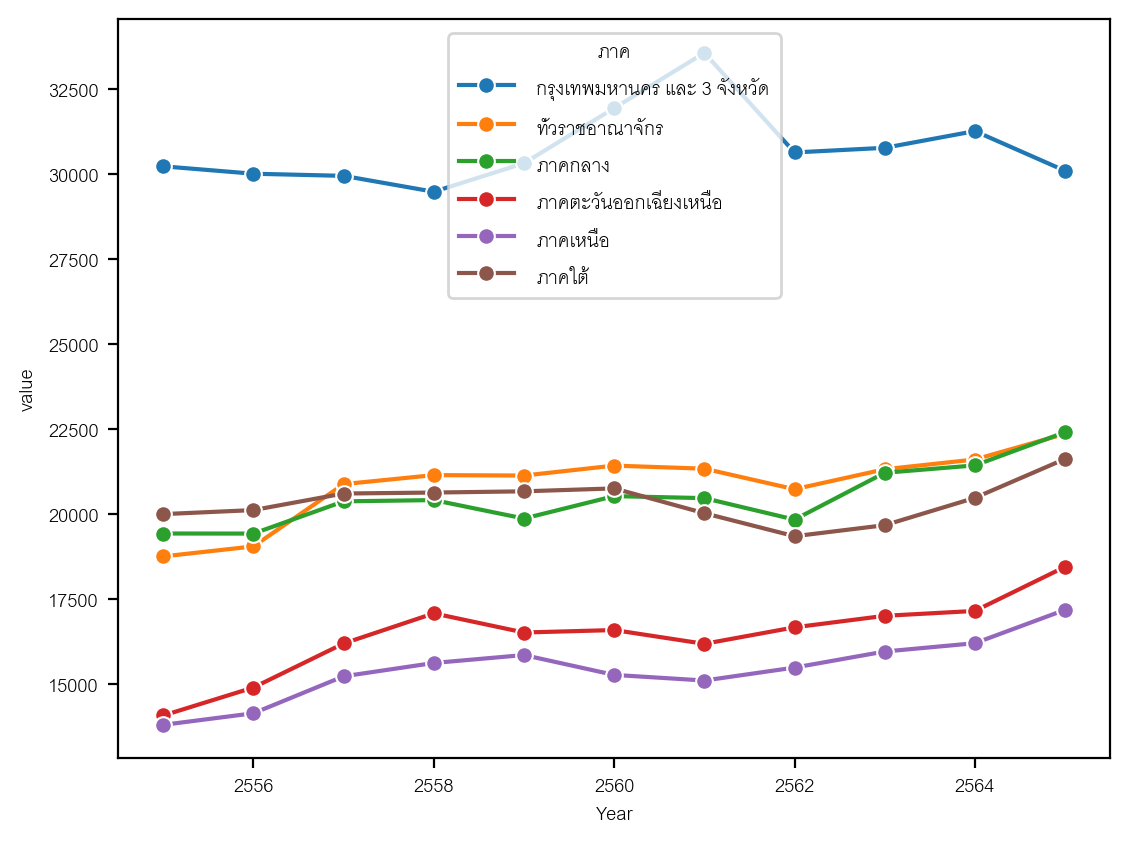

In [59]:
sns.lineplot(data=melt_df1, x='Year', y='value', hue='ภาค', marker='o')

จะเห็นได้จากกราฟนี้ว่าค่าครองชีพของทุกภาคเพิ่มสูงขึ้นอย่างเห็นได้ชัด ยกเว้นภาคใต้ที่มีการเพิ่มขึ้นเพียงเล็กน้อยตลอด 10 ปี และถ้าดูค่าของทั่วทั้งราชอาณาจักร จะพบว่ามีการเพิ่มขึ้น 20% ซึ่งมากกว่าอัตราเงินเฟ้อเพียง 6% ตลอด 10 ปี จึงสามารถสรุปได้ว่าค่าครองชีพที่เพิ่มสูงขึ้นอาจจะส่งผลให้ผู้กู้เงินกยศ.ไม่สามารถชำระหนี้สินคืนได้

In [ ]:
# Groupby จังหวัด

In [21]:
# ตัดภาคออกและตั้งให้จังหวัดเป็น index
df_cleaned = df1.drop(columns=['ภาค']).set_index('จังหวัด')

# คำนวณค่าเฉลี่ยของแต่ละจังหวัดรวมทุกปี
average_per_province = df_cleaned.mean(axis=1)

# แปลงผลลัพธ์เป็น DataFrame สำหรับการแสดงผลที่ดีขึ้น
average_df = average_per_province.reset_index()
average_df.columns = ['จังหวัด', 'ค่าครองชีพเฉลี่ยต่อปี']
# ลบแถวที่มีค่า Na ออกจาก DataFrame
average_df_cleaned = average_df.dropna().round(2)
average_df_cleaned
# แสดงผล DataFrame หลังจากลบแถวที่มีค่า Na

,จังหวัด,ค่าครองชีพเฉลี่ยต่อปี
0,ทั่วราชอาณาจักร,20896.51
1,กรุงเทพมหานคร และ 3 จังหวัด,31615.82
2,กรุงเทพมหานคร,33155.80
3,สมุทรปราการ,24231.08
4,นนทบุรี,31276.24
...,...,...
78,ตรัง,19169.27
79,พัทลุง,17402.25
80,ปัตตานี,15960.76
81,ยะลา,13854.81


In [23]:
# Sort the DataFrame by 'Average Annual Income' from highest to lowest
average_df_cleaned = average_df_cleaned.sort_values(by='ค่าครองชีพเฉลี่ยต่อปี', ascending=False)

# Display the sorted DataFrame
average_df_cleaned.head(10)


,จังหวัด,ค่าครองชีพเฉลี่ยต่อปี
5,ปทุมธานี,33524.84
2,กรุงเทพมหานคร,33155.80
1,กรุงเทพมหานคร และ 3 จังหวัด,31615.82
4,นนทบุรี,31276.24
72,ภูเก็ต,30211.34
13,ชลบุรี,25469.53
73,สุราษฎร์ธานี,25462.83
70,กระบี่,25354.66
12,สระบุรี,24759.10
3,สมุทรปราการ,24231.08


นี่คือ 10 อันดับของค่าครองชีพเฉลี่ยตลอด 10 ปี

## 4. หนี้สินครัวเรือน

ต่อไปเราจะมาดูอีกเหตุผลหนึ่ง เราสันนิษฐานว่าด้วยความที่ค่าดอกเบี้ยของหนี้กยศ.ต่ำ เพียงแค่ 1% ต่อปี คนที่หนี้สินอื่นนอกจากของกยศ.ก็จะไปชำระหนี้อื่นก่อนที่จะมาจ่ายหนี้กยศ.เนื่องจากก็เป็นธรรมชาติที่จะชำระหนี้ที่ดอกเบี้ยสูงกว่าหรือมีงวดชำระที่บ่อยกว่า

1. ควรจะหาอัตรส่วนหนี้นอกระบบต่อหนี้ทั้งหมด
2. ควรจะหาว่าหนี้ครัวเรือนขนาดนี้

In [62]:
# read data_dict and df1
data_dict = pd.read_csv('https://catalogapi.nso.go.th/api/datadic?table=SES_43_01&format=csv')
data_dict
df1 = pd.read_csv('https://catalogapi.nso.go.th/api/index?table=SES_43_01&format=csv')
df1

# analyse informal and formal loan
df1.drop(columns=['CODE_AREA', 'AREA', 'CODE_REGION'], inplace=True)
df2 = df1[['YEAR','REGION' , 'FORMALONLY', 'INFORMALONLY', 'FORMAL_INFORMAL']]

# คำนวณหาค่าของคนที่มีหนี้สินทั้งในและนอกระบบ ด้วยการเอาค่า union - intersect
df2['TRUE_FORMAL_INFORMAL'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] - x['FORMAL_INFORMAL'], axis=1)

# drop 'FORMAL_INFORMAL' because of no more use.
df2.drop('FORMAL_INFORMAL', axis=1)

# คำนวณหาครัวเรือนทั้งหมดที่มีหนี้สิน
df2['Total_Debt'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] + x['TRUE_FORMAL_INFORMAL'], axis=1)

# ใช้ groupby เพื่อหาผลบวกของ ทั้งปีและ Region
df2_clean = df2[['YEAR', 'REGION', 'Total_Debt']]
df2_clean.groupby(['YEAR']).sum()

C:\Users\3lett\AppData\Local\Temp\ipykernel_28296\3843788760.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TRUE_FORMAL_INFORMAL'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] - x['FORMAL_INFORMAL'], axis=1)
C:\Users\3lett\AppData\Local\Temp\ipykernel_28296\3843788760.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Total_Debt'] = df2.apply(lambda x: x['FORMALONLY'] + x['INFORMALONLY'] + x['TRUE_FORMAL_INFORMAL'], axis=1)


,REGION,Total_Debt
YEAR,,
2554,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,80680784
2556,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,81941534
2558,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,79105214
2560,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,81217855
2562,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,74912775
2564,ทั่วราชอาณาจักรทั่วราชอาณาจักรทั่วราชอาณาจักรก...,88237494


## 5. เหตุผลจากตัวโครงสร้างของกยศ

จากการหาข้อมูลว่าอะไรเป็นสิ่งที่ทำให้คนไทยไม่จ่ายหนี้กยศ.นอกจากเหตุผลเหล่านี้ก็มีเหตุผลของการที่โครงสร้างของหนี้กยศ.นั้นออกแบบมาได้อย่างไม่รอบคอบ
1. หนี้กยศ.เป็นหนี้รายปี - การจ่ายหนี้รายปีเป็นวันเดียวกันนั้น ถึงแม้จะสะดวกทางกยศ. แต่เนื่องจากสถานะทางเศรษฐกิจของผู้กู้ส่วนใหญ่ การเก็บเงินข้ามปีเพื่อจ่ายหนี้ นั้นเป็นเรื่องที่ไม่ง่ายเลย
2. เบี้ยปรับสูง - สำหรับหนี้ที่มีดอกเบี้ยเพียง 1% เบี้ยปรับอัตรา 18% ต่อปีนั้นเป็นเบี้ยปรับที่สูงมาก ผลที่กยศ.ต้องการนั่นคือการกระตุ้นให้ลูกหนี้จ่ายหนี้ ให้ผลตรงกันข้าม เมื่อเร็วๆ นี้จึงมีแผนการปรับโครงสร้างหนี้ใหม่
3. จ่ายหนี้ ตัดไม่ถึงเงินต้น - ต่อจากความที่เบี้ยปรับสูง การพลาดการจ่ายหนี้เพียงครั้งเดียวนั้นก็อาจจะทำให้มีปัญหาใหญ่ได้ เนื่องจากเหมือนกับหนี้ทั่วไปที่จะตัดดอกเบี้ยก่อนแล้วค่อยตัดเงินต้น หนี้กยศ.ก็เป็นหนี้ที่ตัดเบี้ยปรับก่อน แล้วค่อยดอกเบี้ย และค่อยเงินต้น ดังนั้นลูกหนี้ที่ผิดนัดชำระหนี้ก็อาจจะต้องจ่ายเบี้ยปรับและดอกเบี้ยไปตลอด เพราะตัดไม่ถึงเงินต้น ซึ่งในปัจจุบันได้มีโอกาศให้สามารถปรับโครงสร้างหนี้ให้ตัดเงินต้นก่อนได้
4. หนี้กยศ.เป็นหนี้ที่ไม่มีการต่อรอง - การกู้ยืมกยศ.ไม่มีการต่อรองใดๆ ทุกสัญญากู้เป็นแบบเดียวกันหมด และนั่นทำให้ไม่สามารถต่อรองสัญญากู้ยืมให้เหมาะกับผู้กู้ได้
5. ยอดที่ต้องจ่ายเพิ่มขึ้นเรื่อยๆ - ทุกๆ ปีหนี้ที่ต้องจ่ายจะเพิ่มขึ้นเรื่อยๆ เช่น งวดแรกจ่าย 1% ของเงินต้น แต่งวดที่ 10 ต้องจ่าย 10% ของเงินต้น ซึ่งไม่มีเหตุผลที่ต้องทำเช่นนั้นลย เนื่องจากก็จะยิ่งทำให้คนที่ฐานะการเงินไม่ดี จ่ายหนี้สินไม่ทัน

## 6. เหตุผลจากวินัยทางการเงินของคนไทยเอง

แน่นอนว่าเราไม่สามารถตำหนิทางกยศ.ได้ทางเดียว ในเมื่อปัญหาทั้งหมดก็จะไม่เกิดขึ้นถ้าผู้กู้จ่ายหนี้คืนตามเวลา และก็มีผู้คนจำนวนมากที่สามารถชำระหนี้กยศ.จนหมดได้ ดังนั้นเราต้องไม่ลืมคำนึงถึงความเป็นไปได้ที่มีคนส่วนหนึ่งที่ไม่มีวินัยทางการเงิน ทำให้เก็บเงินไม่ครบปีได้

# Part 7: เปรียบเทียบปัญหาหนี้ กยศ และ student loan ของ USA และ UK
---


เราจะยึกตามข้อมูลใน Part6: ข้อที่2 ว่าประเทศไทยมีอัตรหนี้เสียประมาณ 22% จากการให้กู้ยืมทั้งหมด และนำมาเปรียบเทียบกับสหรัฐอเมริกา(USA) และราชอาณาจักรอังกฤษ(UK) เพื่อสำรวจว่าอัตราหนี้เสียของต่างประเทศนั้นจะมีค่าเทียบเคียงกับไทยได้ไหม

# Part 8: สรุปแล้วปัญหา หนี้ กยศ ในไทยเป็นเรื่องที่แย่จริงหรือ
---


สรุปแล้วจริงๆ ปัญหาหนี้กยศ.มีอยู่จริงอย่างแน่นอน